## Imports

In [13]:
import os
import tensorflow as tf
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

## Enable GPU memory growth

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Load data from directory and normalize

In [38]:
data_dir = 'data'
datasets = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
labels='inferred',
label_mode='categorical',
color_mode='rgb',
image_size=(256, 256))

data = datasets.map(lambda x, y: (x / 255.0, y))


Found 316 files belonging to 3 classes.


## Split data into train, validation, and test sets

In [39]:
train_size = int(len(data) * 0.7)
validation_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)
train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)
test = data.skip(train_size + validation_size).take(test_size)

## Create model

In [40]:
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(datasets.class_names), activation='softmax'))
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

## Tensorboard logging

In [41]:
logs='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs)

## Train model

In [42]:
hist = model.fit(train, epochs=20, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 6s 696ms/step - loss: 1.6851 - accuracy: 0.3884 - val_loss: 1.0948 - val_accuracy: 0.3125
Epoch 2/20
7/7 [==============================] - 6s 759ms/step - loss: 1.0697 - accuracy: 0.4241 - val_loss: 1.0071 - val_accuracy: 0.5469
Epoch 3/20
7/7 [==============================] - 6s 701ms/step - loss: 0.9785 - accuracy: 0.5580 - val_loss: 0.8686 - val_accuracy: 0.7344
Epoch 4/20
7/7 [==============================] - 6s 706ms/step - loss: 0.8024 - accuracy: 0.6786 - val_loss: 0.7120 - val_accuracy: 0.6562
Epoch 5/20
7/7 [==============================] - 5s 674ms/step - loss: 0.7002 - accuracy: 0.7188 - val_loss: 0.7294 - val_accuracy: 0.6406
Epoch 6/20
7/7 [==============================] - 6s 701ms/step - loss: 0.5395 - accuracy: 0.8080 - val_loss: 0.5260 - val_accuracy: 0.8594
Epoch 7/20
7/7 [==============================] - 5s 686ms/step - loss: 0.4400 - accuracy: 0.8482 - val_loss: 0.4439 - val_accuracy: 0.8750
Epoch 8/20
7/7 [====

## Save model

In [43]:
model.save(os.path.join('model','classifierModel.h5'))

## Test image

1/1 [==============================] - 0s 52ms/step


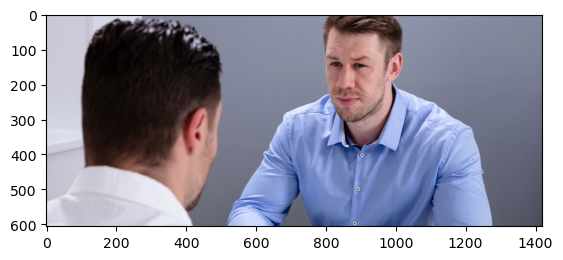

Vorraussichtliche Klasse ist mensch mit einer wahrscheinlichkeit von 74.1%


In [44]:
try:
    imgPath = 'menschtest.jpg'
    modelPath = os.path.join('model', 'classifierModel.h5')
    
    new_classifier_model = load_model(modelPath)
    test_image = cv2.imread(imgPath)
    resized_test_image = tf.image.resize(test_image, (256, 256))
    prediction = new_classifier_model.predict(np.expand_dims(resized_test_image / 255, 0))
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = datasets.class_names[predicted_class_index]
    predicted_class_percent = prediction[0][predicted_class_index]*100
    
    if predicted_class_percent < 50:
        print("Das Model erkennt auf dem Vorgegeben Bild nichts, bitte Trainiere es weiter")
    else:
        plt.imshow(cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB))
        plt.show()
        print(f'Vorraussichtliche Klasse ist {predicted_class_name} mit einer wahrscheinlichkeit von {round(predicted_class_percent, 1)}%')
        
except Exception as e:
    print("Fehler:", e)
    